In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_table("tagged.csv")

In [3]:
df.head()

n_comments  year                                              title  \
0           0  2015                 consuming government data python d   
1           1  2015                        dont get scared get started   
2           0  2015  distributed scheduling leveraging multiple nod...   
3           0  2015                       analyzing python code pylint   
4           0  2015       python  metaprogramming macros madness  more   

                                        speaker_info  \
0  pratap vardhan data scientist gramenercom data...   
1  tapasweni pathaki done bachelors it igdtuw i w...   
2  i software engineer red hat inc working gluste...   
3  im open source enthusiast coming romania lead ...   
4  suhas data scientist gramener previously engin...   

                        section target_audience   type  \
0  data visualization analytics    intermediate  talks   
1                        others        beginner  talks   
2                   concurrency        beginner  talks   
3                        others    intermediate  talks   
4                   core python    intermediate  talks   

                                       prerequisites  \
0                                                NaN   
1                        nothingother passion coding   
2  a basic understanding distributed system works...   
3  the participants basic understanding python no...   
4                                                NaN   

                                         description speaker_link_present  \
0  the explosion open data especially government ...                False   
1  opensource world full excitement knowledge enc...                False   
2  setting cron job machine perhaps easiest way s...                 True   
3  given dynamic nature python bugs tend creep co...                False   
4  summaryever wanted conquer world fell short kn...                False   

  content_url_present  deadlinediff selected  
0               False           -94     True  
1               False             1    False  
2                True            35    False  
3               False          -112    False  
4               False           -94     True

In [4]:
df.columns

Index([u'n_comments', u'year', u'title', u'speaker_info', u'section',
       u'target_audience', u'type', u'prerequisites', u'description',
       u'speaker_link_present', u'content_url_present', u'deadlinediff',
       u'selected'],
      dtype='object')

In [5]:
categoricals = []
for col in "section target_audience type".split():
    categoricals.append(pd.get_dummies(df[col]).values)

In [6]:
[x.shape for x in categoricals]

[(290, 13), (290, 3), (290, 2)]

In [7]:
import numpy as np

In [8]:
xCat = np.hstack(categoricals)

In [9]:
xCat.shape

(290, 18)

In [10]:
xBool = df['speaker_link_present content_url_present'.split()].astype(int)

In [11]:
xText = df['title speaker_info prerequisites description'.split()].copy()
xText.fillna(value=" ", inplace=True)

In [12]:
xText = xText.apply(lambda x: " ".join(x), axis=1)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
xText = TfidfVectorizer().fit_transform(xText.values)

In [15]:
xNum = df['n_comments deadlinediff'.split()].values

In [16]:
feats = [xCat, xBool.values, xText.toarray(), xNum]

In [17]:
X = np.hstack(feats)
y = df['selected'].astype(int).values

In [18]:
from scipy.io import savemat
savemat("trainData.mat", dict(X=X, y=y))

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
xScaled = StandardScaler().fit_transform(X)

In [21]:
from sklearn.linear_model import LogisticRegression
from jeeves.cross_validation import report_stratifiedKfold_cv

In [22]:
report_stratifiedKfold_cv(LogisticRegression(), X, y, shuffle=True)

accuracy_score  recall_score
0        0.830508      0.307692
1        0.827586      0.384615
2        0.913793      0.615385
3        0.810345      0.538462
4        0.842105      0.500000

In [23]:
from sklearn.svm import SVC

In [24]:
report_stratifiedKfold_cv(SVC(), X, y, shuffle=True)

accuracy_score  recall_score
0        0.864407      0.615385
1        0.844828      0.615385
2        0.879310      0.538462
3        0.913793      0.692308
4        0.754386      0.166667

In [25]:
x_non_text = [xCat, xBool.values, xNum]

In [26]:
x_non_text = np.hstack(x_non_text)

In [27]:
x_non_text_scaled = StandardScaler().fit_transform(x_non_text)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

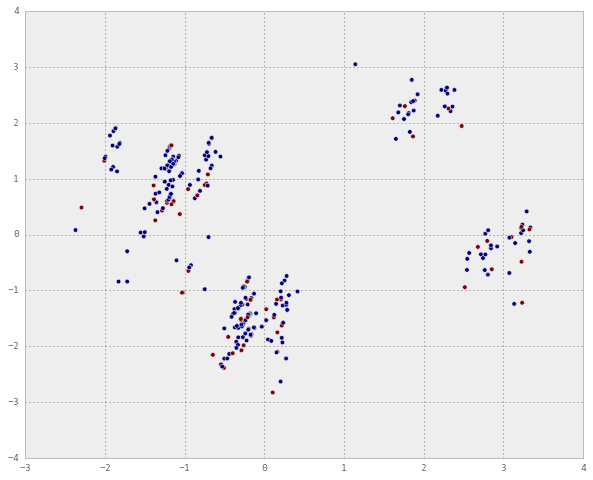

In [29]:
x_red = pca.fit_transform(x_non_text_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(x_red[:, 0], x_red[:, 1], c=y)

In [30]:
report_stratifiedKfold_cv(LogisticRegression(), x_non_text_scaled, y, shuffle=True)

accuracy_score  recall_score
0        0.847458      0.615385
1        0.827586      0.384615
2        0.844828      0.692308
3        0.810345      0.307692
4        0.859649      0.500000

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
report_stratifiedKfold_cv(RandomForestClassifier(), x_non_text, y, shuffle=True, n_folds=10)

accuracy_score  recall_score
0        0.866667      0.571429
1        0.766667      0.000000
2        0.866667      0.428571
3        0.766667      0.571429
4        0.896552      0.500000
5        0.896552      0.833333
6        0.785714      0.500000
7        0.892857      0.833333
8        0.964286      0.833333
9        0.821429      0.333333

In [33]:
report_stratifiedKfold_cv(DecisionTreeClassifier(), x_non_text, y, shuffle=True, n_folds=10)

accuracy_score  recall_score
0        0.833333      0.428571
1        0.900000      0.714286
2        0.966667      1.000000
3        0.966667      1.000000
4        0.965517      0.833333
5        0.896552      0.833333
6        0.821429      0.666667
7        0.928571      0.666667
8        0.928571      0.833333
9        1.000000      1.000000

In [34]:
print report_stratifiedKfold_cv(RandomForestClassifier(), x_non_text, y, shuffle=True, n_folds=10).mean()
print report_stratifiedKfold_cv(RandomForestClassifier(), X, y, shuffle=True, n_folds=10).mean()

accuracy_score    0.861938
recall_score      0.578571
dtype: float64
accuracy_score    0.786486
recall_score      0.076190
dtype: float64


In [35]:
print report_stratifiedKfold_cv(DecisionTreeClassifier(), x_non_text, y, shuffle=True, n_folds=10).mean()
print report_stratifiedKfold_cv(DecisionTreeClassifier(), X, y, shuffle=True, n_folds=10).mean()

accuracy_score    0.927635
recall_score      0.828571
dtype: float64
accuracy_score    0.895747
recall_score      0.745238
dtype: float64


In [36]:
from sklearn.grid_search import GridSearchCV
param_grid = dict(
    criterion="gini entropy".split(), splitter="best random".split(),
    max_features=[None, "auto", "sqrt", "log2"],
    class_weight=["balanced", None],
    presort=[True, False]
)
clf = DecisionTreeClassifier()
from sklearn.metrics import recall_score
gcv = GridSearchCV(clf, param_grid=param_grid, n_jobs=-1, scoring="accuracy")

In [37]:
gcv.fit(x_non_text, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'presort': [True, False], 'max_features': [None, 'auto', 'sqrt', 'log2'], 'class_weight': ['balanced', None], 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [39]:
gcv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': None,
 'presort': False,
 'splitter': 'best'}

In [40]:
clf = gcv.best_estimator_

In [42]:
report_stratifiedKfold_cv(clf, x_non_text, y, n_folds=10)

accuracy_score  recall_score
0        0.933333      1.000000
1        0.900000      0.571429
2        0.933333      0.857143
3        0.900000      0.857143
4        0.896552      0.666667
5        0.965517      0.833333
6        0.928571      0.666667
7        0.892857      0.833333
8        0.928571      0.833333
9        0.928571      0.833333

In [43]:
from sklearn.tree import export_graphviz

In [44]:
with open("cfp_classifier.dot", "w") as f_out:
    export_graphviz(clf, out_file=f_out)

In [ ]:
from IPython.display import Image  
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,  
                feature_names=iris.feature_names,  
                class_names=iris.target_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  